In [13]:
from ProText import gen, stopw, lemma, stem, low, dig, clean_len, WCloud 

'# Import the libraries\nimport tweepy\nfrom textblob import TextBlob\nfrom wordcloud import WordCloud\nimport pandas as pd\nimport numpy as np\nimport re\nimport matplotlib.pyplot as plt'

In [14]:
# Provide Twiteer developer key

consumer_key = "WSGnIr0NDML8CxfL8P41Y61qO"
consumer_secret = "1WYN8ch4sjsYw1TFwkSJEX9n1vTUf8vIpdkxDJyNhOjFAxXaDS"
access_token = "275071458-gBgDALP1NEOga2av4abur7usfPq9Cyd7c1GylDrF"
access_token_secret = "ZYxBLb4872L8AZMtRg6GttwnSI6CZEExgnhz4OVWAIFE4"

# calling API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Provide the keyword you want to pull the data e.g. "Python".
keyword = "#Covid-19"

In [15]:
# Extracts 50 tweets from related to #Covid-19
posts = api.search(keyword, count=10000, lang='en', exclude='retweets', tweet_mode='extended')

In [16]:
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) A single-cell atlas of lymphocyte adaptive immune repertoires and transcriptomes reveals age-related differences in convalescent COVID-19 patients  https://t.co/8eJtF8Qv9w #bioRxiv

2) VACCINES AVAILABLE FOR ADDISON SENIOR CITIZENS!
The @AddisonVillage has procured a limited number of COVID-19 vaccines for senior citizens, age 65 or older, who live in Addison.  Starting at 10:00am on Feb 13th call (630) 693-7599 for an appointment. https://t.co/s3a6EZTD4f

3) @rhallnj @paulkrugman The first line of the scheduling email says this: “It is now time to schedule your appointment to get a COVID-19 vaccine.”  Then there is a link to click. Even with this, it took hours to book one.

4) 'This Is Exhausting': How NBA Staffers Are Handling New Responsibilities Under COVID-19 Protocols https://t.co/QyM83NPZr7 via @nuzzel

5) @luchini_dr School, 4 parents work as flight attendant, 2 PD officers &amp; dental hygienist &amp; no one gets Covid-19? Ok, they wear masks, of

In [17]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['tweets'])
# Show the first 5 rows of data
df.head()

,tweets
0,A single-cell atlas of lymphocyte adaptive imm...
1,VACCINES AVAILABLE FOR ADDISON SENIOR CITIZENS...
2,@rhallnj @paulkrugman The first line of the sc...
3,'This Is Exhausting': How NBA Staffers Are Han...
4,"@luchini_dr School, 4 parents work as flight a..."


In [18]:
# Copy of df data frame
dfcleaned = df.copy()

In [19]:
# Run the needed Text Pre processing as per the need of the analysis
dfcleaned['tweets'] = dfcleaned['tweets'].apply(low).apply(gen).apply(stopw).apply(clean_len)

<FreqDist with 945 samples and 1491 outcomes>


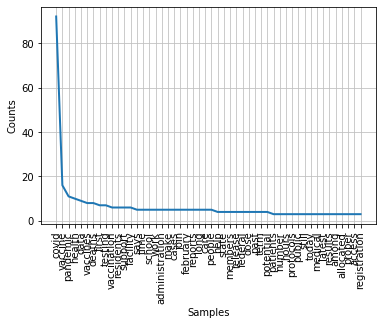

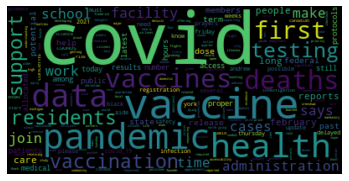

In [20]:
# Create Wordcloud just passing the dataframe
WCloud(dfcleaned.tweets)